## Korrelation
----------------------------------------

In [15]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#%run ../src/notebook_env.py

### Pearson-Produkt-Moment-Korrelationskoeffizient

Die Korrelation ist eine weit verbreitete Methode zur Untersuchung der Beziehung zwischen **quantitativen Variablen**. Die am häufigsten verwendete Statistik ist der **lineare Korrelationskoeffizient** $r$, der zu Ehren seines Entwicklers, <a href="https://en.wikipedia.org/wiki/Karl_Pearson">Karl Pearson</a>, auch als <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson-Produkt-Moment-Korrelationskoeffizient</a> bekannt ist. Er ist gegeben durch

$$ r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{ \sum_{i=1}^n (y_i - \bar{y})^2}} = \frac{s_{xy}}{s_x s_y}$$

wobei $s_{xy}$ die Kovarianz von $x$ und $y$ und $s_x$ und $s_y$ die Standardabweichung von $x$ bzw. $y$ sind. Durch Division durch die Standardabweichungen der Stichprobe, $s_x$ und $s_y$, wird der lineare Korrelationskoeffizient, $r$, skalenunabhängig und nimmt Werte zwischen $-1$ und $1$ an.

Der lineare Korrelationskoeffizient misst die Stärke der linearen Beziehung zwischen zwei Variablen. Liegt $r$ nahe bei $\pm 1$, sind die beiden Variablen stark korreliert, und in einem Streudiagramm liegen die Datenpunkte um eine Linie herum. Liegt $r$ weit von $\pm 1$ entfernt, sind die Datenpunkte weiter gestreut. Liegt $r$ nahe bei $0$, sind die Datenpunkte im Wesentlichen um eine horizontale Linie gestreut, was darauf hindeutet, dass es fast keine lineare Beziehung zwischen den Variablen gibt.

<br> <br> 
![Alt-Text](pearson.png) <br> <br>

Eine interessante Eigenschaft von $r$ ist, dass sein Vorzeichen die Steigung der linearen Beziehung zwischen zwei Variablen widerspiegelt. Ein positiver Wert von $r$ deutet darauf hin, dass die Variablen **positiv linear korreliert** sind, was bedeutet, dass $y$ tendenziell linear zunimmt, wenn $x$ zunimmt. Ein negativer Wert von $r$ deutet darauf hin, dass die Variablen **negativ linear korreliert** sind, was bedeutet, dass $y$ tendenziell linear abnimmt, wenn $x$ zunimmt.

Es gibt keine eindeutige Klassifizierungsregel für die Größe einer linearen Beziehung zwischen zwei Variablen. Die folgende Tabelle kann jedoch als Faustregel für den Umgang mit den numerischen Werten des Pearson-Produkt-Moment-Korrelationskoeffizienten dienen.

\begin{array}{lc}
\hline
\ \text{starke lineare Korrelation} & r > 0,9 \\
\ \text{mittlere lineare Korrelation} & 0,7 < r \le 0,9\\
\ \text{schwache lineare Korrelation} & 0,5 < r \le 0,7 \\
\ \text{keine oder zweifelhafte lineare Korrelation} & 0 < r \le 0,5 \\
\hline 
\end{array}

Die Pearson-Korrelation setzt voraus, dass die Variablen annähernd normalverteilt sind, und sie ist bei Vorhandensein von Ausreißern nicht robust.

In einem späteren Abschnitt über lineare Regression wird das Bestimmtheitsmaß, $R^2$
ein anschauliches Maß für die Qualität von linearen Modellen. Es besteht eine enge Beziehung zwischen $R^2$ und dem linearen Korrelationskoeffizienten $r$. Das Bestimmtheitsmaß $R^2$ ist gleich dem Quadrat des linearen Korrelationskoeffizienten $r$.

$$\text{Determinationskoeffizient} (R^2) = r^2$$

### Korrelationskoeffizient nach Pearson: Ein Beispiel

Um ein Gefühl dafür zu bekommen, berechnen wir den Pearson-Produkt-Moment-Korrelationskoeffizienten in einem Beispiel. Dazu laden wir den `students` Datensatz in unseren Arbeitsbereich (Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen).

In [16]:
# Einlesen der Daten als Dataframe
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary*.

In diesem Beispiel wird **die lineare Beziehung zwischen dem Gewicht und der Größe der Studenten** untersucht. Dazu wählen wir zufällig $37$ Studenten aus und extrahieren die Variablen `height` und `weight` aus dem Datensatz.

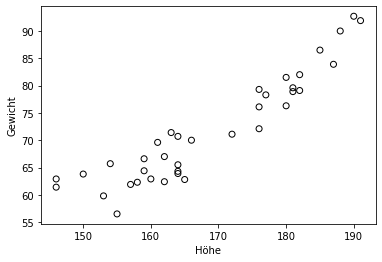

In [18]:
# Wähle zufällige Stichprobe n=37 aus ohne doppelt auszuwählen
students_sample = students.sample(37, replace = False, random_state = 1)

# Lese height und weight der Probe aus dem dataframe in Listen ein
height_sample = students_sample['height']
weight_sample = students_sample['weight']

# scatter - plot

plt.scatter(height_sample, weight_sample, c ="none",marker ="o",edgecolor ="k")
 
plt.xlabel("Höhe")
plt.ylabel("Gewicht")
plt.show()

Das Streudiagramm zeigt, dass eine lineare Beziehung zwischen den beiden betrachteten Variablen besteht. Für diese Übung berechnen wir den linearen Korrelationskoeffizienten zunächst von Hand und wenden dann die `np.corrcoef()`-Funktion in Python an. Wir erinnern uns an die Gleichung von oben

$$ r = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{ \sum_{i=1}^n (y_i - \bar{y})^2}} = \frac{s_{xy}}{s_x s_y}$$

In [19]:
# Berechne Mittelwert für height_sample,weight_sample
x=weight_sample.to_numpy()
y=height_sample.to_numpy()
x_m=weight_sample_mean=np.mean(weight_sample)
y_m=height_sample_mean=np.mean(height_sample)

# Berechne Pearson Korrelationskoeffizienten
sum_zähler=0
sum_nenner_x=0
sum_nenner_y=0
ergebnis = 0
for i in range(len(weight_sample)):
    sum_zähler += (x[i] - x_m)*(y[i] - y_m)
    sum_nenner_x += ((x[i] - x_m)**2)
    sum_nenner_y += ((y[i] - y_m)**2)
sum_nenner_x = np.sqrt(sum_nenner_x)
sum_nenner_y = np.sqrt(sum_nenner_y)

ergebnis = sum_zähler/((sum_nenner_x)*(sum_nenner_y))
ergebnis

0.9295600715108283

Zur Überprüfung des Ergebnisses berechnen wir das Verhältnis der Kovarianz von $x$ und $y$ und die Standardabweichung von $x$ und $y$.

$$ r = \frac{s_{xy}}{s_x s_y} $$

In [20]:
# Berechne Kovarianz zwischen height_sample und weight_sample
kovarianz=np.cov(height_sample, weight_sample)[0,1]

# Berechne Standardabweichung für height_sample und weight_sample
std_height_sample = np.std(height_sample,ddof = 1)
std_weight_sample = np.std(weight_sample,ddof = 1)

# Berechne Pearsonkorrelationskoeffizienten
kovarianz/(std_height_sample*std_weight_sample)

0.929560071510828

Zum Schluss wenden wir die Funktion `np.corrcoef` an, die im `numpy` Paket enthalten ist.

In [21]:
np.corrcoef(weight_sample, height_sample)[0,1]

0.9295600715108282

Perfekt! Die vier Berechnungen ergeben genau das gleiche Ergebnis! Der lineare Korrelationskoeffizient beträgt $r=0,9295600715108282$. Daraus können wir schließen, dass es einen starken linearen Zusammenhang zwischen der Größe und dem Gewicht eines Studenten gibt.

Natürlich ist eine Korrelationsanalyse nicht auf zwei Variablen beschränkt. Dank statistischer Softwarepakete, wie Python, können wir eine paarweise Korrelationsanalyse für mehr als zwei Variablen durchführen. Lassen Sie uns zunächst den Datensatz vorbereiten. Für eine bessere Visualisierung ziehen wir $100$ zufällig ausgewählte Studenten aus dem `students` Datensatz. Dann wählen wir eine Reihe von Variablen aus, um eine Korrelationsanalyse durchzuführen.

In [22]:
# Wähle zufällige Stichprobe n=100 aus ohne doppelt auszuwählen
students_sample = students.sample(100, replace = False,random_state = 1)

# Erzeuge neues Dataframe students_sample_num
students_sample_num = pd.DataFrame({'height':students_sample['height'],
                                'weight':students_sample['weight'],
                                'nc.score':students_sample['nc.score'],
                                'score1':students_sample['score1']
                               ,'score2':students_sample['score2'],
                                'salary':students_sample['salary']})
students_sample_num.head(10)

,height,weight,nc.score,score1,score2,salary
7005,155,56.5,3.92,51.0,60.0,NaN
3206,185,86.5,1.45,79.0,74.0,61067.567774
4544,160,62.9,3.51,NaN,NaN,NaN
2104,162,62.4,1.93,63.0,67.0,NaN
3510,159,64.4,1.52,64.0,72.0,NaN
628,180,76.3,1.66,NaN,NaN,NaN
537,154,65.7,1.07,44.0,58.0,NaN
5419,146,61.4,1.14,79.0,67.0,NaN
645,159,66.6,1.90,62.0,66.0,NaN
5267,190,92.7,3.58,NaN,NaN,NaN


Offensichtlich enthalten einige Variablen fehlende Werte, die als $NaN$ bezeichnet werden. Wir können diese Werte aus der Analyse ausschließen, indem wir die Methode `dropna()` hinzufügen.

In [23]:
# Entferne Spalten die NaN enthalten
students_sample_num2 = students_sample_num.dropna(axis=0,how='any')
students_sample_num2.head(10)

,height,weight,nc.score,score1,score2,salary
3206,185,86.5,1.45,79.0,74.0,61067.567774
4837,187,83.9,1.20,87.0,92.0,54543.161710
8142,180,81.5,1.58,85.0,88.0,44367.343815
3197,181,79.6,1.17,70.0,63.0,52343.760327
7854,176,72.1,1.57,81.0,70.0,49220.865757
1537,177,78.3,1.20,71.0,74.0,53304.276513
6378,176,76.1,2.68,52.0,55.0,46075.274269
8150,184,81.9,1.93,62.0,74.0,47310.789837
104,177,73.3,1.57,89.0,91.0,36204.300962
5746,176,75.5,2.09,73.0,65.0,47803.066671


Die Methode `np.corr()` liefert eine schöne Tabelle, auch **Korrelationsmatrix** genannt, mit den paarweisen Pearsonschen Korrelationskoeffizienten. 

In [24]:
students_sample_num2.corr()

,height,weight,nc.score,score1,score2,salary
height,1.000000,0.856534,-0.702764,0.146947,0.147321,0.696874
weight,0.856534,1.000000,-0.675235,0.216165,0.246973,0.752920
nc.score,-0.702764,-0.675235,1.000000,-0.538485,-0.539815,-0.792284
score1,0.146947,0.216165,-0.538485,1.000000,0.835408,0.245481
score2,0.147321,0.246973,-0.539815,0.835408,1.000000,0.207123
salary,0.696874,0.752920,-0.792284,0.245481,0.207123,1.000000


Eine Tabelle ist eine schöne Darstellung für eine Korrelationsanalyse, aber eine Abbildung würde natürlich die Interpretierbarkeit verbessern. Python bietet die Funktion `pairplot()` zur Darstellung von Korrelationsmatrizen.

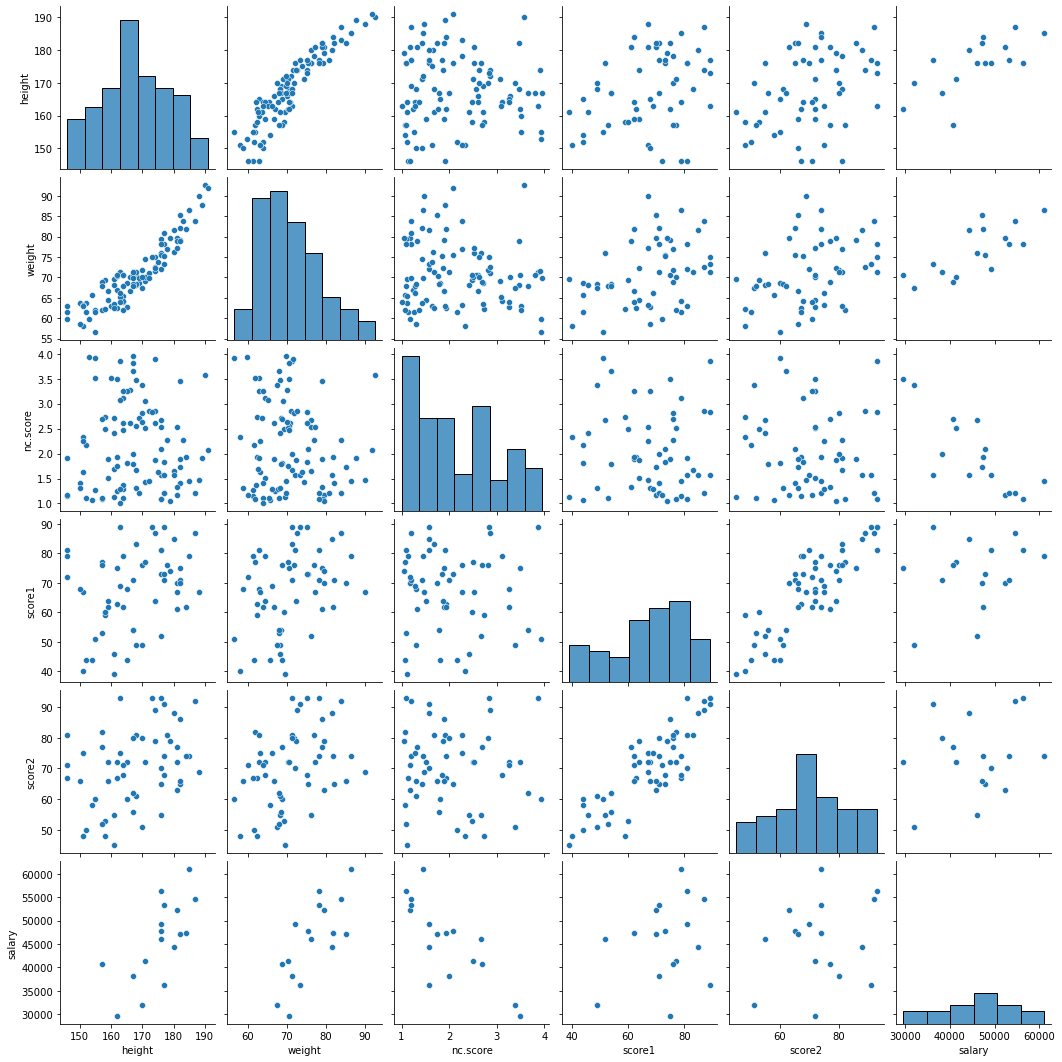

In [25]:
# Erzeuge Pair Plot
sns.pairplot(students_sample_num)

Es fällt sofort auf, dass die Mehrzahl der Variablen nicht linear korreliert zu sein scheint. Im Gegensatz dazu scheinen die Variablenpaare `height` und `weight` sowie `score1` und `score2` positiv korreliert zu sein.

### Rangkorrelationskoeffizient nach Spearman

Der <a href="https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient">Rangkorrelationskoeffizient nach Spearman</a>, auch bekannt als Spearmans $\rho$, ist ein nichtparametrischer Rangkorrelationskoeffizient. Er wurde von <a href="https://en.wikipedia.org/wiki/Charles_Spearman">Charles Spearman</a> entwickelt und ist eine Alternative zum Produkt-Moment-Korrelationskoeffizienten von Pearson. Der Spearman $\rho$ Rangkorrelationskoeffizient wird für Stichprobendaten mit $r_s$ und für Grundgesamtheitsdaten mit $\rho_s$ bezeichnet (Mann 2012). Der Korrelationskoeffizient bewertet die monotone Beziehung zwischen zwei Variablen und liegt zwischen $-1$ und $1$. Er beschreibt die lineare Korrelation zwischen den Rängen der Daten zu den Variablen $x$ und $y$. Die Spearman-Korrelation ist hoch, wenn die Variablen einen ähnlichen Rang haben, und niedrig, wenn die Variablen einen ungleichen Rang haben.

Um $r_s$ zu berechnen, werden die Daten für jede Variable, $x$ und $y$, getrennt eingestuft. Die Differenz zwischen jedem Paar von Rängen bezeichnen wir mit $d$. Für eine gegebene bivariate Sequenz $(x_1,y_1),(x_2,y_2), \dots,(x_n,y_n)$ ist Spearmans $r_s$ gegeben durch

$$ r_s = 1 - \frac{6 \sum_{i=1}^n (r_{xi} - r_{yi})^2}{n(n^2 -1)} $$

wobei $r_{xi}=Rank(x_i)$ , $r_{yi}=Rank(y_i)$ , und $n$
die Stichprobengröße ist.

Im Gegensatz zum linearen Korrelationskoeffizienten von Pearson ist der lineare Koeffizient von Spearman sowohl für quantitative als auch für ordinale Variablen geeignet. Außerdem sind rangbasierte Korrelationen nicht von der Normalverteilungsannahme abhängig und resistenter gegenüber Ausreißern (Schumann 2010).

### Spearman's Rangkorrelationskoeffizient: Ein Beispiel

Betrachten wir ein Beispiel. Die Bevölkerung einer Gemeinde an einem Fluss ist der Meinung, dass der jüngste Anstieg der Abflussspitzen auf die Abholzung durch ein Holzunternehmen in den letzten Jahren zurückzuführen ist. Wir berechnen den Spearman'schen Rangkorrelationskoeffizienten, um festzustellen, ob es eine Korrelation zwischen dem Spitzenabfluss und dem Anteil der abgeholzten Fläche im Wassereinzugsgebiet gibt (Daten geändert nach <a href=https://www.routledge.com/Modeling-Hydrologic-Change-Statistical-Methods/McCuen/p/book/9781566706001>McCuen 2003, S. 112</a>.

\begin{array}{lc}
\hline
\ \text{Jahr} & \text{Abflussspitzen (m}^3 \text{s}^{-1}) & \text{abgeholzten Fläche (%)} \\
\hline
\ 1982 & 227 & 53  \\
\ 1983 & 249 & 56  \\
\ 1984 & 210 & 57 \\
\ 1985 & 190 & 58  \\
\ 1986 & 314 & 55  \\
\ 1987 & 345 & 54 \\
\ 1988 & 161 & 51  \\
\ 1988 & 266 & 50  \\
\ 1989 & 402 & 49 \\
\ 1990 & 215 & 57  \\
\ 1991 & 164 & 46  \\
\ 1992 & 405 & 44 \\
\ 1993 & 328 & 43 \\
\ 1994 & 294 & 42 \\
\hline 
\end{array}

Lassen Sie uns unsere Datenvektoren konstruieren. Wir ordnen die Abflusswerte der Variablen `Q` und die abgeholzte Fläche der Variablen `logged` zu.

In [26]:
# Erzeuge Listen Q, logged
Q = [227,249,210,190,314,345,161,266,402,215,164,405,328,294]
logged = [53,56,57,58,55,54,51,50,49,47,46,44,43,42]

# Erzeuge Dataframe aus Q und logged
df = pd.DataFrame(list(zip(Q,logged)),columns=['Q', 'logged'])

Zunächst berechnen wir den Spearman'schen Rangkorrelationskoeffizienten per Hand. Erinnern Sie sich an die Gleichung

$$ r_s = 1 - \frac{6 \sum_{i=1}^n (r_{xi} - r_{yi})^2}{n(n^2 -1)} $$

wobei $r_{xi}=Rang(x_i)$ , $r_{yi}=Rang(y_i)$ , und $n$ der Stichprobenumfang ist. Wir verwenden die Methode `rank()`, um den Rang für die Werte jeder Variablen zu berechnen.

In [27]:
df_ranked = df.rank()
r_xi = df['Q']
r_yi = df['logged']
r_xi = r_xi.rank()
r_yi = r_yi.rank()
r_s = 0
n = len(Q)
for i in range(n):
    r_s += (6*((r_xi[i]-r_yi[i])**2))
r_s = 1 - r_s/(n*(n**2-1))
print(r_s)

-0.34065934065934056


Alternativ können wir auch die Funktion `corr()` in Python verwenden und das Argument `method = 'spearman'` hinzufügen.

In [28]:
df.corr(method = 'spearman')

,Q,logged
Q,1.000000,-0.340659
logged,-0.340659,1.000000


Der Rangkorrelationskoeffizient von Spearman ist nichts anderes als der lineare Korrelationskoeffizient von Pearson für die gerankten Daten. Das Ergebnis der folgenden Codezelle sollte mit den vorherigen Ergebnissen übereinstimmen.

In [29]:
df_ranked.corr()

,Q,logged
Q,1.000000,-0.340659
logged,-0.340659,1.000000


Perfekt, wir erhielten das gleiche Ergebnis durch alle drei Berechnungen, die einen Spearman's Rangkorrelationskoeffizienten von $r_s = -0,34$ ergeben. Die Ergebnisse deuten darauf hin, dass es keine bis eine schwache negative Korrelation zwischen dem Spitzenabfluss und der Einschlagsfläche gibt. Mit anderen Worten, der Abfluss nimmt tendenziell ab, wenn die Abholzungsfläche zunimmt. Die Wahrnehmung der Bevölkerung kann also durch unsere statistische Analyse nicht bestätigt werden. Es wird empfohlen, einen statistischen Test durchzuführen, um festzustellen, ob das Ergebnis statistisch signifikant ist oder ob die Abweichung nur zufällig ist. Weitere Informationen finden Sie in den Abschnitten über *Hypothesentests*.